<h1>Parsing and Processing</h1>

In [1]:
import os
import pandas as pd

In [9]:
source_dir = "output_data/Cheats/user_76561199847502271" 
cheater_dir = "Final/Processed/Cheater"
non_cheater_dir = "Final/Processed/NonCheater"

os.makedirs(cheater_dir, exist_ok=True)
os.makedirs(non_cheater_dir, exist_ok=True)

In [10]:
cheater_steamid = 76561199847502271

# Verify source directory exists
if not os.path.exists(source_dir):
    raise FileNotFoundError(f"Data directory '{source_dir}' not found. Create it and add CSV files first.")

In [11]:
# Process files
for file_name in os.listdir(source_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(source_dir, file_name)
        
        try:
            df = pd.read_csv(file_path)
            
            # Remove 'name' column if present
            if 'name' in df.columns:
                df = df.drop('name', axis=1)
            
            # Check for cheater steamid presence
            if cheater_steamid in df['steamid'].values:
                target_path = os.path.join(cheater_dir, file_name)
            else:
                target_path = os.path.join(non_cheater_dir, file_name)
            
            # Save processed CSV
            df.to_csv(target_path, index=False)
            print(f"Processed: {file_name}")
            
        except Exception as e:
            print(f"Error processing {file_name}: {str(e)}")

print("Processing complete. Files saved to:")
print(f"- Cheaters: {cheater_dir}")
print(f"- Legit players: {non_cheater_dir}")


Processed: kill_event_2232_to_2532.csv
Processed: kill_event_3154_to_3454.csv
Processed: kill_event_2056_to_2356.csv
Processed: kill_event_3892_to_4192.csv
Processed: kill_event_5625_to_5925.csv
Processed: kill_event_4937_to_5237.csv
Processed: kill_event_7414_to_7714.csv
Processed: kill_event_1075_to_1375.csv
Processed: kill_event_3447_to_3747.csv
Processed: kill_event_3277_to_3577.csv
Processed: kill_event_6993_to_7293.csv
Processed: kill_event_1604_to_1904.csv
Processed: kill_event_1267_to_1567.csv
Processed: kill_event_311_to_611.csv
Processed: kill_event_1442_to_1742.csv
Processed: kill_event_6770_to_7070.csv
Processed: kill_event_2393_to_2693.csv
Processed: kill_event_4531_to_4831.csv
Processed: kill_event_3772_to_4072.csv
Processed: kill_event_1934_to_2234.csv
Processed: kill_event_4734_to_5034.csv
Processed: kill_event_6552_to_6852.csv
Processed: kill_event_7197_to_7497.csv
Processed: kill_event_5420_to_5720.csv
Processed: kill_event_2921_to_3221.csv
Processed: kill_event_513_t

<h1>Feature Engineering</h1>

In [13]:
import os
import pandas as pd
import numpy as np

In [14]:
def engineer_features(df):
    # Calculate velocities
    df['pitch_velocity'] = df['pitch'].diff() / df['tick'].diff()
    df['yaw_velocity'] = df['yaw'].diff() / df['tick'].diff()
    
    # Calculate accelerations
    df['pitch_acceleration'] = df['pitch_velocity'].diff() / df['tick'].diff()
    df['yaw_acceleration'] = df['yaw_velocity'].diff() / df['tick'].diff()
    
    # Calculate jerk (rate of change of acceleration)
    df['pitch_jerk'] = df['pitch_acceleration'].diff() / df['tick'].diff()
    df['yaw_jerk'] = df['yaw_acceleration'].diff() / df['tick'].diff()
    
    # Calculate cumulative angular displacement
    df['cumulative_pitch'] = df['pitch'].cumsum()
    df['cumulative_yaw'] = df['yaw'].cumsum()
    
    # Statistical features per segment
    for col in ['pitch', 'yaw']:
        df[f'{col}_mean'] = df[col].mean()
        df[f'{col}_std'] = df[col].std()
        df[f'{col}_min'] = df[col].min()
        df[f'{col}_max'] = df[col].max()
        df[f'{col}_range'] = df[f'{col}_max'] - df[f'{col}_min']
    
    return df.dropna()

In [17]:
# Directory setup
base_dir = "Final/Processed"
categories = ["Cheater", "NonCheater"]
engineered_dir = "Final/Engineered"

# Create engineered data directories
os.makedirs(engineered_dir, exist_ok=True)
for category in categories:
    os.makedirs(os.path.join(engineered_dir, category), exist_ok=True)

# Process each category
for category in categories:
    category_path = os.path.join(base_dir, category)
    
    for file in os.listdir(category_path):
        if file.endswith('.csv'):
            input_path = os.path.join(category_path, file)
            output_path = os.path.join(engineered_dir, category, f"engineered_{file}")
            
            # Read and process
            df = pd.read_csv(input_path)
            engineered_df = engineer_features(df)
            
            # Save with category preservation
            engineered_df.to_csv(output_path, index=False)
            print(f"Processed: {category}/{file}")

print("Feature engineering completed with category preservation.")

Processed: Cheater/kill_event_2232_to_2532.csv
Processed: Cheater/kill_event_3154_to_3454.csv
Processed: Cheater/kill_event_2056_to_2356.csv
Processed: Cheater/kill_event_3892_to_4192.csv
Processed: Cheater/kill_event_5625_to_5925.csv
Processed: Cheater/kill_event_4937_to_5237.csv
Processed: Cheater/kill_event_7414_to_7714.csv
Processed: Cheater/kill_event_1075_to_1375.csv
Processed: Cheater/kill_event_3447_to_3747.csv
Processed: Cheater/kill_event_3277_to_3577.csv
Processed: Cheater/kill_event_6993_to_7293.csv
Processed: Cheater/kill_event_1604_to_1904.csv
Processed: Cheater/kill_event_1267_to_1567.csv
Processed: Cheater/kill_event_311_to_611.csv
Processed: Cheater/kill_event_1442_to_1742.csv
Processed: Cheater/kill_event_6770_to_7070.csv
Processed: Cheater/kill_event_2393_to_2693.csv
Processed: Cheater/kill_event_4531_to_4831.csv
Processed: Cheater/kill_event_3772_to_4072.csv
Processed: Cheater/kill_event_1934_to_2234.csv
Processed: Cheater/kill_event_4734_to_5034.csv
Processed: Chea

<H1>Visualization</H1>

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
CHEATER_DIR = "Final/Engineered/Cheater"
NON_CHEATER_DIR = "Final/Engineered/NonCheater"
os.makedirs(CHEATER_DIR, exist_ok=True)
os.makedirs(NON_CHEATER_DIR, exist_ok=True)

In [20]:
def load_data(directory):
    dfs = []
    try:
        for file in os.listdir(directory):
            if file.endswith('.csv'):
                df = pd.read_csv(os.path.join(directory, file))
                dfs.append(df)
        return pd.concat(dfs, ignore_index=True)
    except FileNotFoundError:
        print(f"Directory {directory} not found. Creating empty DataFrame.")
        return pd.DataFrame()

In [22]:
cheater_df = load_data(CHEATER_DIR)

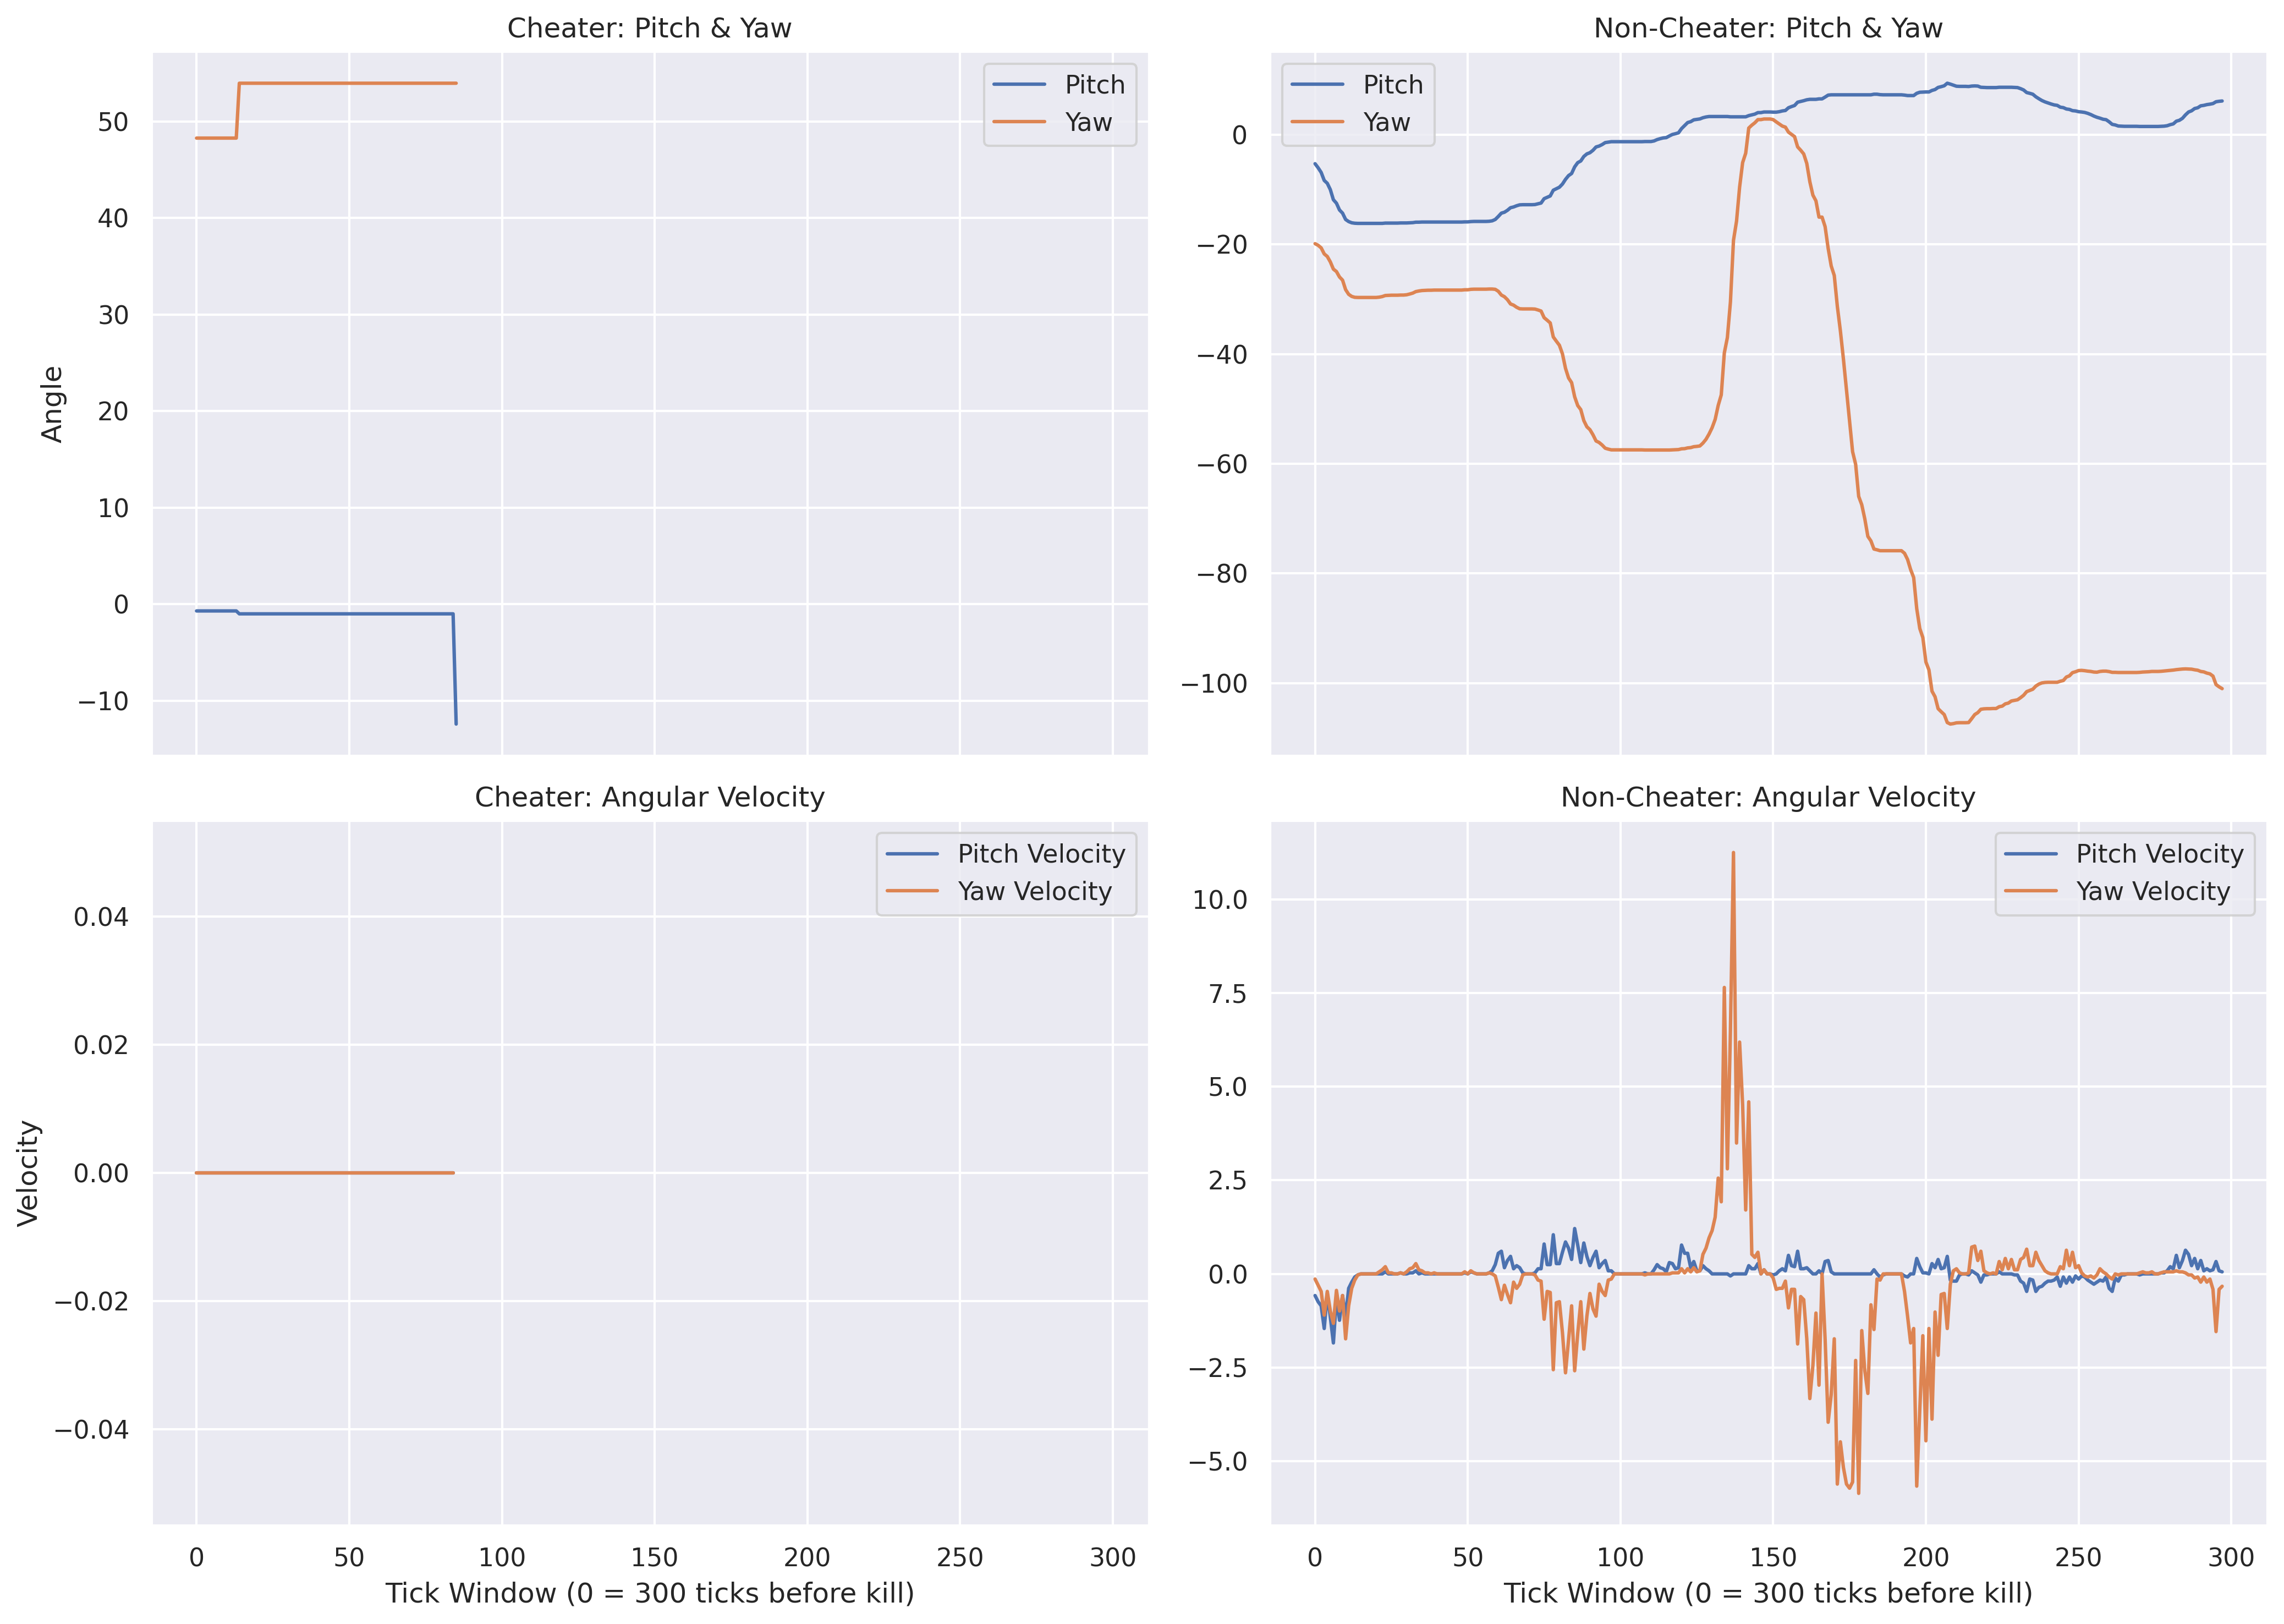

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one engineered CSV for each
cheater_file = 'Final/Engineered/Cheater/engineered_kill_event_7414_to_7714.csv'
non_cheater_file = 'nonSegmented_processed/engineered_data/non_cheater/engineered_subdf_tick_11583_to_11883_attacker_76561199470374288.csv'

cheater_df = pd.read_csv(cheater_file).reset_index(drop=True)
noncheater_df = pd.read_csv(non_cheater_file).reset_index(drop=True)

# Create a 0-300 x-axis (or up to the length of your data)
cheater_x = cheater_df.index
noncheater_x = noncheater_df.index

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Cheater Pitch/Yaw
axs[0,0].plot(cheater_x, cheater_df['pitch'], label='Pitch')
axs[0,0].plot(cheater_x, cheater_df['yaw'], label='Yaw')
axs[0,0].set_title('Cheater: Pitch & Yaw')
axs[0,0].set_ylabel('Angle')
axs[0,0].legend()

# Non-cheater Pitch/Yaw
axs[0,1].plot(noncheater_x, noncheater_df['pitch'], label='Pitch')
axs[0,1].plot(noncheater_x, noncheater_df['yaw'], label='Yaw')
axs[0,1].set_title('Non-Cheater: Pitch & Yaw')
axs[0,1].legend()

# Cheater Velocity
axs[1,0].plot(cheater_x, cheater_df['pitch_velocity'], label='Pitch Velocity')
axs[1,0].plot(cheater_x, cheater_df['yaw_velocity'], label='Yaw Velocity')
axs[1,0].set_title('Cheater: Angular Velocity')
axs[1,0].set_xlabel('Tick Window (0 = 300 ticks before kill)')
axs[1,0].set_ylabel('Velocity')
axs[1,0].legend()

# Non-cheater Velocity
axs[1,1].plot(noncheater_x, noncheater_df['pitch_velocity'], label='Pitch Velocity')
axs[1,1].plot(noncheater_x, noncheater_df['yaw_velocity'], label='Yaw Velocity')
axs[1,1].set_title('Non-Cheater: Angular Velocity')
axs[1,1].set_xlabel('Tick Window (0 = 300 ticks before kill)')
axs[1,1].legend()

plt.tight_layout()
plt.show()

